In [ ]:
import pandas as pd
from google.colab import files
import io
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import math

In [ ]:
uploaded = files.upload()

Saving bitcoin_price_1week_Test - Test.csv to bitcoin_price_1week_Test - Test.csv
Saving bitcoin_price_Training - Training.csv to bitcoin_price_Training - Training.csv


In [ ]:
df_train = pd.read_csv(io.BytesIO(uploaded['bitcoin_price_Training - Training.csv']))
df_train = df_train[::-1].reset_index(drop=True)
print(df_train)

              Date     Open     High      Low    Close         Volume  \
0     Apr 28, 2013   135.30   135.98   132.10   134.21              -   
1     Apr 29, 2013   134.44   147.49   134.00   144.54              -   
2     Apr 30, 2013   144.00   146.93   134.05   139.00              -   
3     May 01, 2013   139.00   139.89   107.72   116.99              -   
4     May 02, 2013   116.38   125.60    92.28   105.21              -   
...            ...      ...      ...      ...      ...            ...   
1551  Jul 27, 2017  2538.71  2693.32  2529.34  2671.78    789,104,000   
1552  Jul 28, 2017  2679.73  2897.45  2679.73  2809.01  1,380,100,000   
1553  Jul 29, 2017  2807.02  2808.76  2692.80  2726.45    803,746,000   
1554  Jul 30, 2017  2724.39  2758.53  2644.85  2757.18    705,943,000   
1555  Jul 31, 2017  2763.24  2889.62  2720.61  2875.34    860,575,000   

          Market Cap  
0      1,500,520,000  
1      1,491,160,000  
2      1,597,780,000  
3      1,542,820,000  
4      1

In [ ]:
df_test = pd.read_csv(io.BytesIO(uploaded['bitcoin_price_1week_Test - Test.csv']))
df_test = df_test[::-1].reset_index(drop=True)
print(df_test)

           Date     Open     High      Low    Close         Volume  \
0  Aug 01, 2017  2871.30  2921.35  2685.61  2718.26  1,324,670,000   
1  Aug 02, 2017  2727.13  2762.53  2668.59  2710.67  1,094,950,000   
2  Aug 03, 2017  2709.56  2813.31  2685.14  2804.73    804,797,000   
3  Aug 04, 2017  2806.93  2899.33  2743.72  2895.89  1,002,120,000   
4  Aug 05, 2017  2897.63  3290.01  2874.83  3252.91  1,945,700,000   
5  Aug 06, 2017  3257.61  3293.29  3155.60  3213.94  1,105,030,000   
6  Aug 07, 2017  3212.78  3397.68  3180.89  3378.94  1,482,280,000   

       Market Cap  
0  47,321,800,000  
1  44,950,800,000  
2  44,666,400,000  
3  46,276,200,000  
4  47,778,200,000  
5  53,720,900,000  
6  52,987,300,000  


In [ ]:
train_data = df_train['Open']
test_data = df_test['Open']

In [ ]:
train_data = np.array(train_data)
test_data = np.array(test_data)
data = np.concatenate((train_data, test_data))

In [ ]:
print(data.shape)

(1563,)


In [ ]:
scaler = MinMaxScaler(feature_range=(0, 1)).fit(data.reshape(data.shape[0], 1))
data = scaler.transform(data.reshape(data.shape[0], 1))

In [ ]:
data = data.reshape(data.shape[0])
train_data = data[:round(0.7*len(data))]
test_data = data[round(0.7*len(data)):]
print(data.shape)
print(train_data.shape)
print(test_data.shape)

(1563,)
(1094,)
(469,)


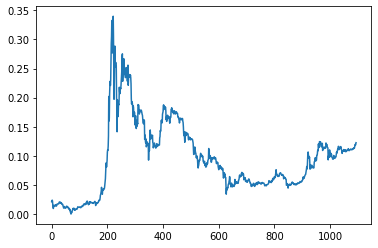

In [ ]:
plt.plot(train_data)

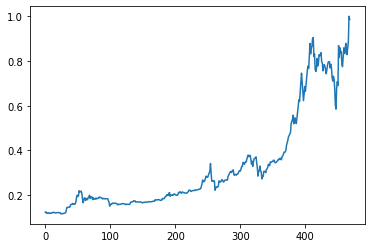

In [ ]:
plt.plot(test_data)

In [ ]:
def create_data(data, timestep):
  dataY = []
  dataX = []
  for i in range(len(data)-timestep):
    dataX.append(data[i:i+timestep])
    dataY.append(data[i+timestep])
  return np.array(dataX), np.array(dataY)

In [ ]:
timestep = 7
trainX, trainY = create_data(train_data, timestep)
trainX = np.reshape(trainX, (trainX.shape[0], timestep, 1))

testX, testY = create_data(test_data, timestep)
testX = np.reshape(testX, (testX.shape[0], timestep, 1))

In [ ]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)

(1087, 7, 1)
(1087,)
(462, 7, 1)
(462,)


In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.LSTM(4, input_shape=(timestep, 1)),
  tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')
history = model.fit(trainX, trainY, epochs=50, batch_size=1, verbose=2, validation_data = (testX, testY))

Epoch 1/50
1087/1087 - 4s - loss: 3.8595e-04 - 4s/epoch - 4ms/step
Epoch 2/50
1087/1087 - 2s - loss: 1.6567e-04 - 2s/epoch - 2ms/step
Epoch 3/50
1087/1087 - 2s - loss: 1.5263e-04 - 2s/epoch - 2ms/step
Epoch 4/50
1087/1087 - 2s - loss: 1.3965e-04 - 2s/epoch - 2ms/step
Epoch 5/50
1087/1087 - 3s - loss: 1.2245e-04 - 3s/epoch - 2ms/step
Epoch 6/50
1087/1087 - 2s - loss: 1.1095e-04 - 2s/epoch - 2ms/step
Epoch 7/50
1087/1087 - 2s - loss: 1.0268e-04 - 2s/epoch - 2ms/step
Epoch 8/50
1087/1087 - 2s - loss: 9.2221e-05 - 2s/epoch - 2ms/step
Epoch 9/50
1087/1087 - 3s - loss: 9.3657e-05 - 3s/epoch - 2ms/step
Epoch 10/50
1087/1087 - 3s - loss: 8.4880e-05 - 3s/epoch - 2ms/step
Epoch 11/50
1087/1087 - 2s - loss: 8.6674e-05 - 2s/epoch - 2ms/step
Epoch 12/50
1087/1087 - 2s - loss: 7.9504e-05 - 2s/epoch - 2ms/step
Epoch 13/50
1087/1087 - 2s - loss: 7.8088e-05 - 2s/epoch - 2ms/step
Epoch 14/50
1087/1087 - 2s - loss: 7.7408e-05 - 2s/epoch - 2ms/step
Epoch 15/50
1087/1087 - 3s - loss: 7.0541e-05 - 3s/epoch 

In [ ]:
trainPredict = model.predict(trainX)

In [ ]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY.reshape(trainY.shape[0],1))

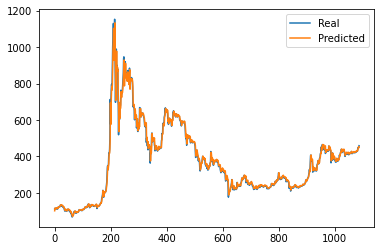

In [ ]:
plt.plot(trainY, label='Real')
plt.plot(trainPredict, label='Predicted')
plt.legend()

In [ ]:
trainScore = math.sqrt(mean_squared_error(trainY[:,0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))

Train Score: 23.93 RMSE


In [ ]:
testPredict = model.predict(testX)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY.reshape(testY.shape[0],1))

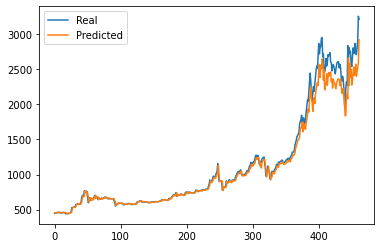

In [ ]:
plt.plot(testY, label='Real')
plt.plot(testPredict, label='Predicted')
plt.legend()

In [ ]:
testScore = math.sqrt(mean_squared_error(testY[:,0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 121.71 RMSE


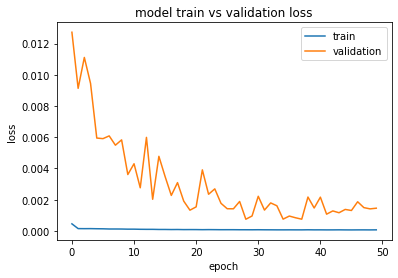

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')